Importing Libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

Consider only the below columns and prepare a prediction model for predicting Price.



Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears",
"Quarterly_Tax","Weight")]

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)


Importing Dataset

In [85]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (3).csv


In [86]:
Corolla=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
Corolla.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [87]:
Corolla=Corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [88]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


Descriptive Analysis

In [89]:
Corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


Checking for missing values

In [90]:
Corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [91]:
Corolla[Corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [92]:
#To check which of the rows are duplicated
Corolla[(Corolla['Price']==24950) & (Corolla['Weight']==1320)]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [93]:
Corolla=Corolla.drop_duplicates()
Corolla[Corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [94]:
Corolla.shape

(1435, 9)

In [95]:
Corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## EDA

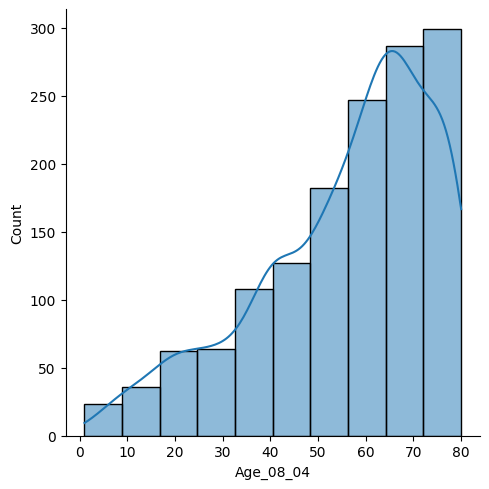

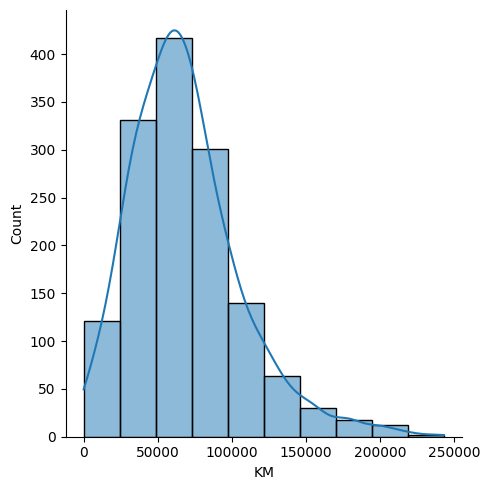

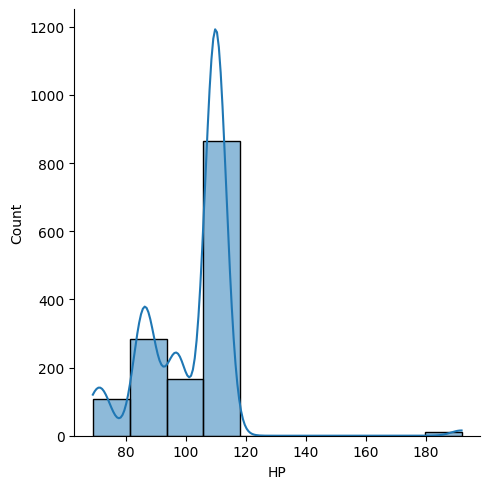

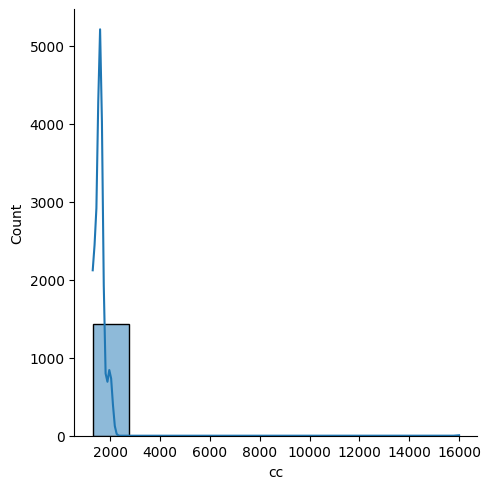

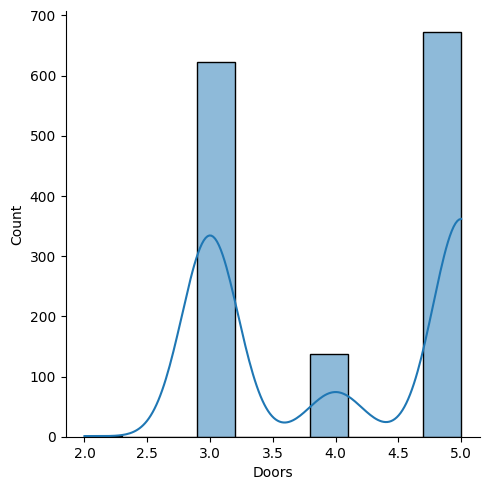

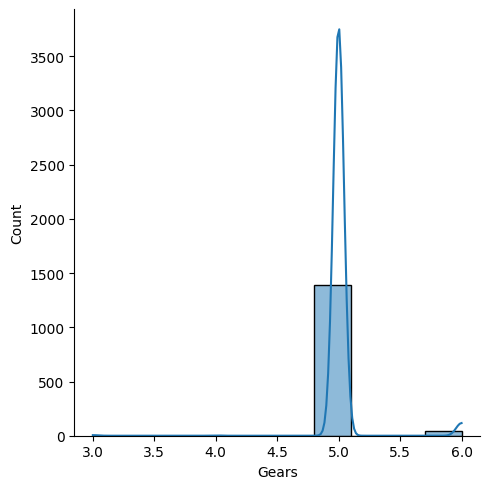

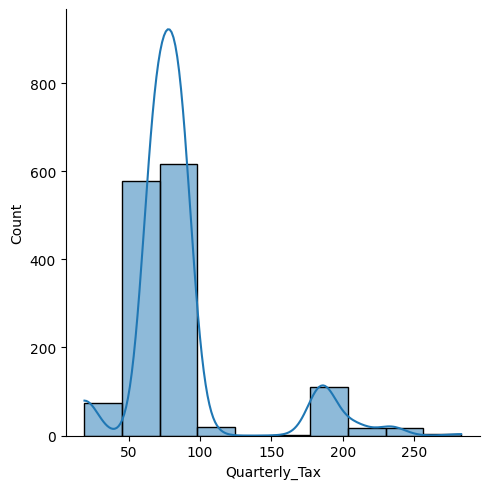

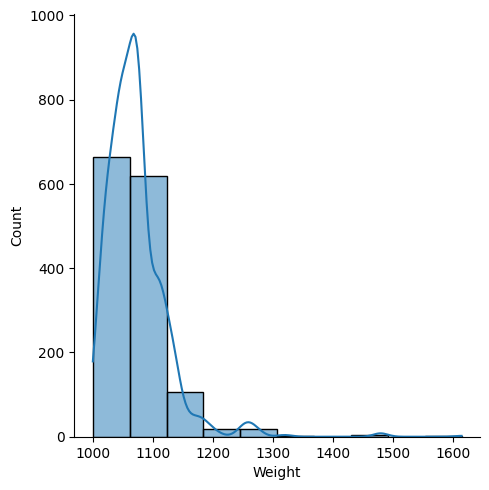

In [96]:
#sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.displot(Corolla['Age_08_04'], bins = 10, kde = True)
sns.displot(Corolla['KM'], bins = 10, kde = True)
sns.displot(Corolla['HP'], bins = 10, kde = True)
sns.displot(Corolla['cc'], bins = 10, kde = True)
sns.displot(Corolla['Doors'], bins = 10, kde = True)
sns.displot(Corolla['Gears'], bins = 10, kde = True)
sns.displot(Corolla['Quarterly_Tax'], bins = 10, kde = True)
sns.displot(Corolla['Weight'], bins = 10, kde = True)

Preparing a model without removing skwenes and outliers

In [97]:
#Build model
model= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = Corolla).fit()

In [98]:
#Beta Coefficients
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [99]:
#Predicted Values for price
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1431     8794.255037
1432     8292.577342
1433     8455.434402
1434     8579.222041
1435    10396.087526
Length: 1435, dtype: float64

In [100]:
Corolla['Predictions_Model']=model.fittedvalues

In [101]:
Corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Predictions_Model
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277


In [102]:
Corolla.nunique()

Price                 236
Age_08_04              77
KM                   1263
HP                     12
cc                     13
Doors                   4
Gears                   4
Quarterly_Tax          13
Weight                 59
Predictions_Model    1434
dtype: int64

In [103]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


**Null Hypothesis - The independent variable is not at all significantly related to the dependent variable**

**Alternate Hypothesis - The independent variable is significantly related to the dependent variable**

For any variable, if p-value<0.05, then we can consider that variable to be useful/significant to predict the dependent variable.

In [104]:
model.pvalues

Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64

In [105]:
#R squared values
model.rsquared

0.8625200256947001

**Transformations on Independent Variables To make better R^2**

In [106]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

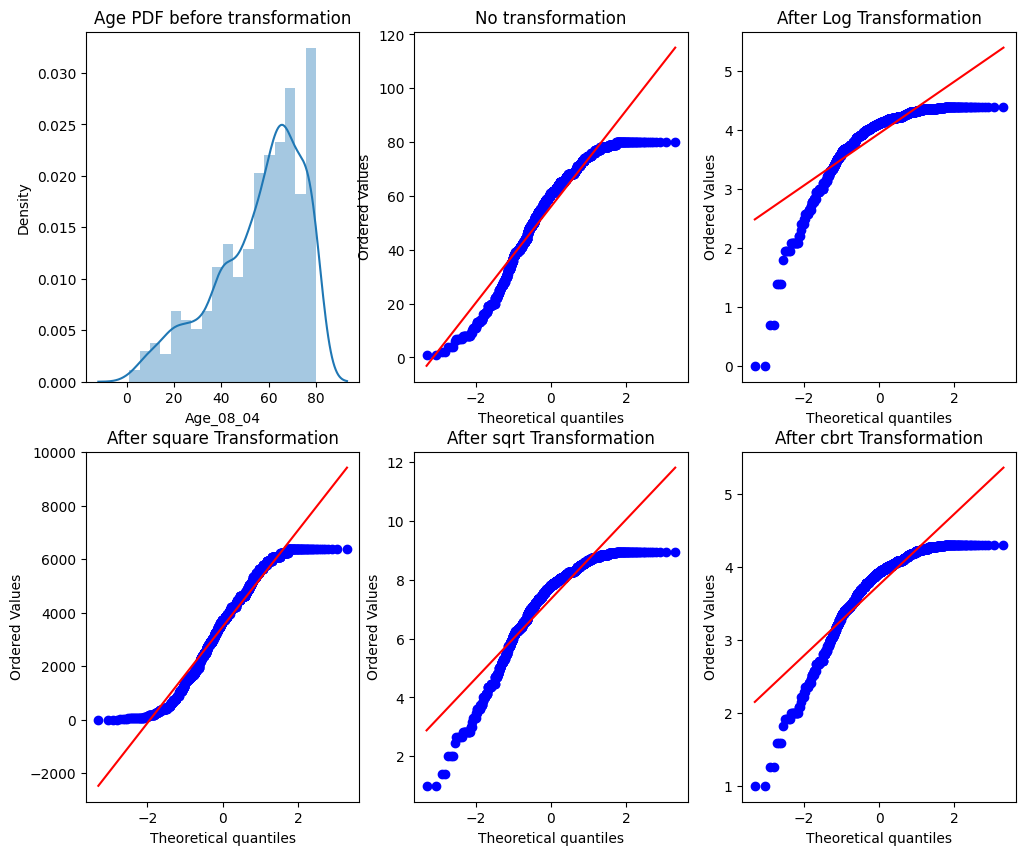

In [107]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['Age_08_04'])
plt.title('Age PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['Age_08_04'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['Age_08_04']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['Age_08_04']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['Age_08_04']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['Age_08_04']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

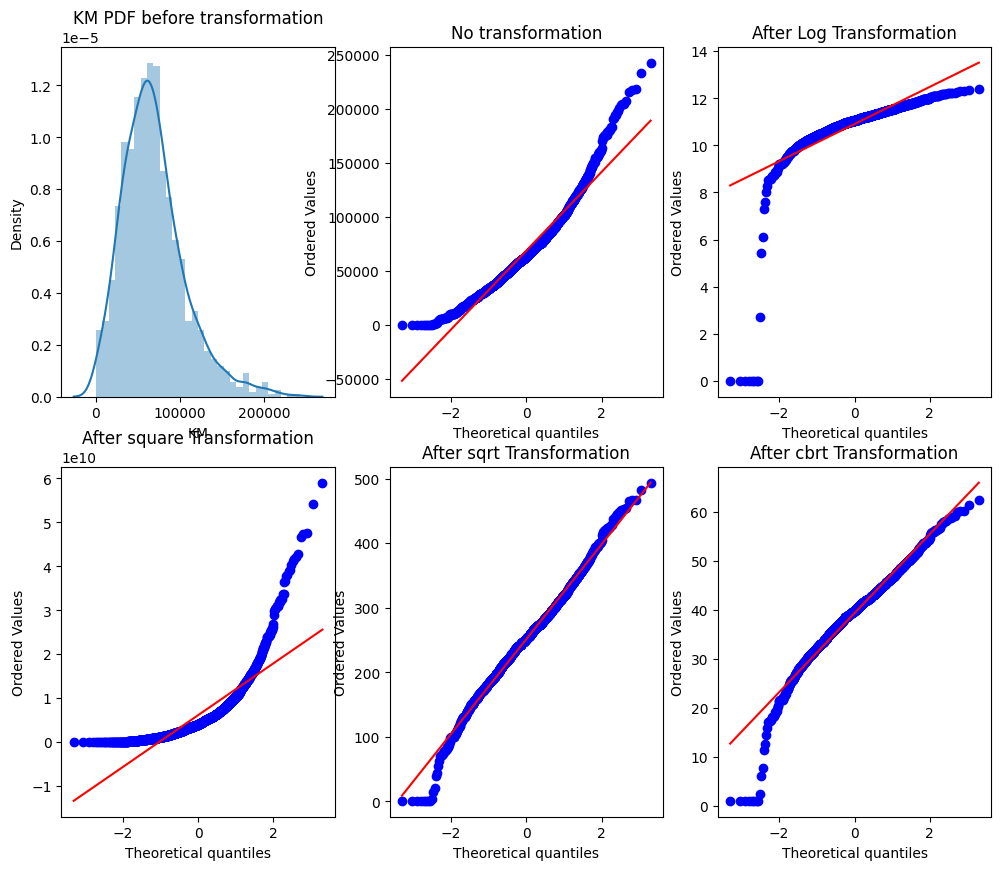

In [108]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['KM'])
plt.title('KM PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['KM'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['KM']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['KM']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['KM']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['KM']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

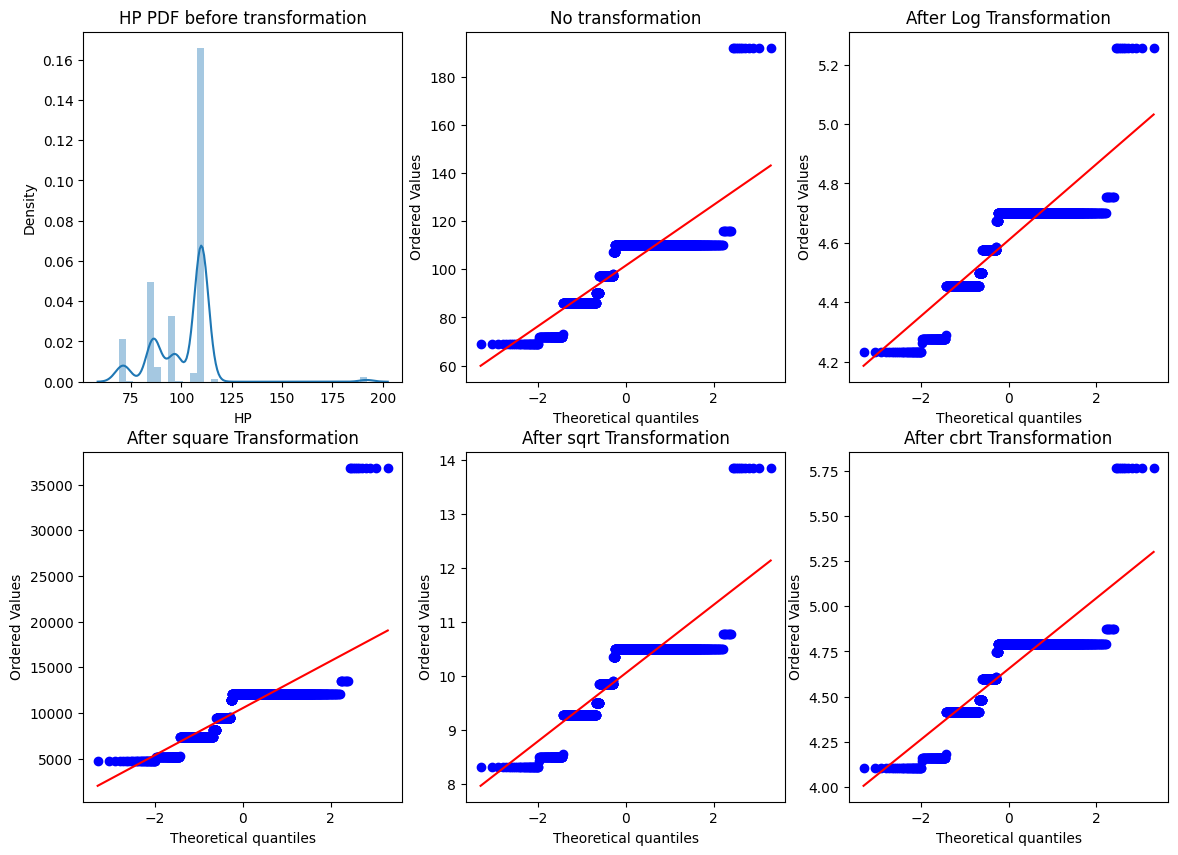

In [109]:
plt.figure(figsize=(14,10))

plt.subplot(231)
sns.distplot(Corolla['HP'])
plt.title('HP PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['HP'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['HP']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['HP']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['HP']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['HP']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

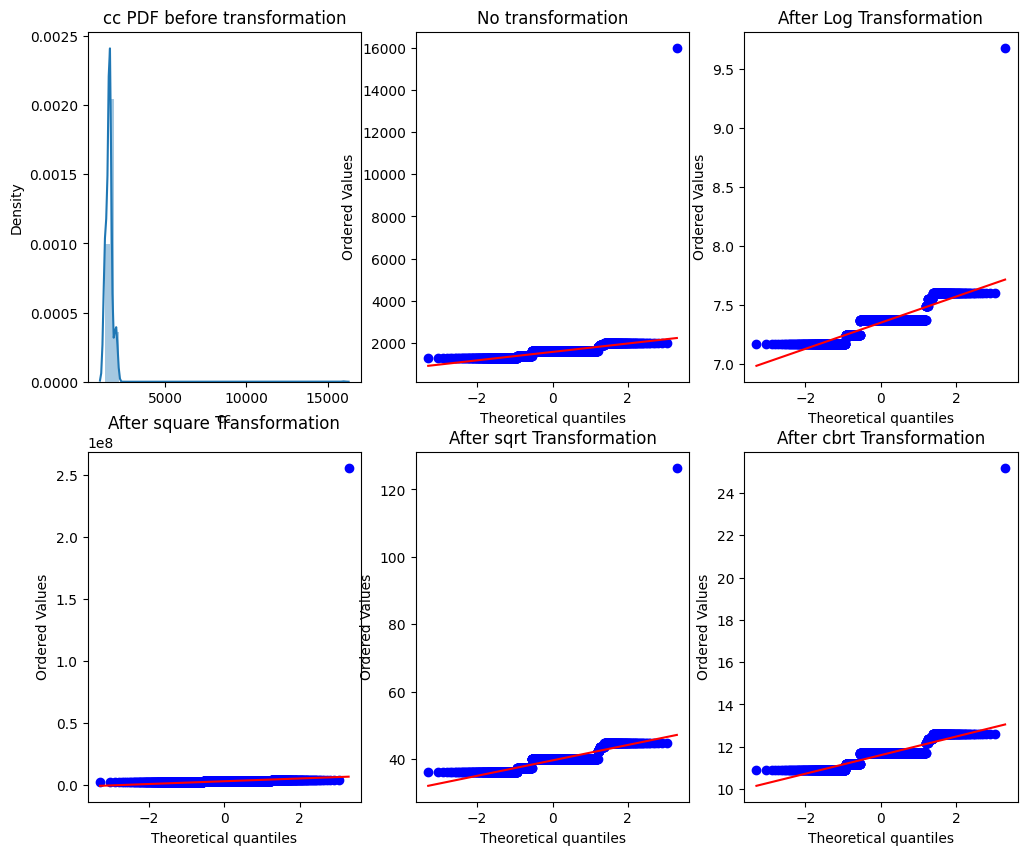

In [110]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['cc'])
plt.title('cc PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['cc'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['cc']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['cc']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['cc']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['cc']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

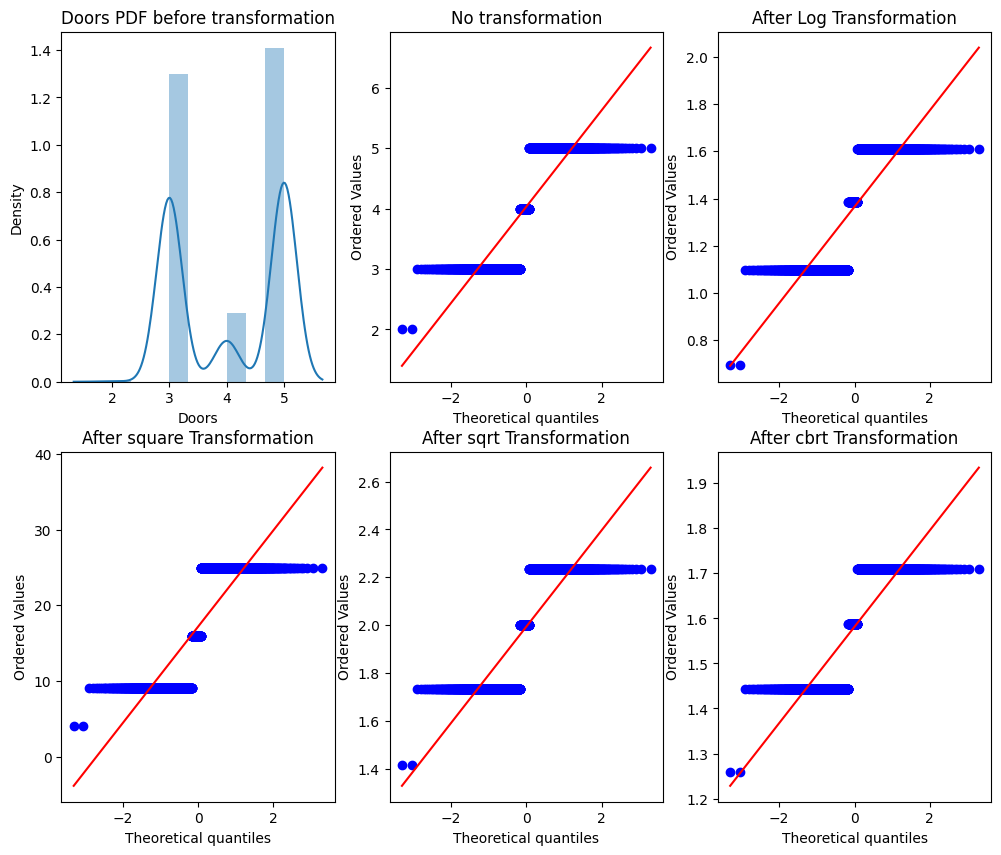

In [111]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['Doors'])
plt.title('Doors PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['Doors'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['Doors']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['Doors']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['Doors']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['Doors']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

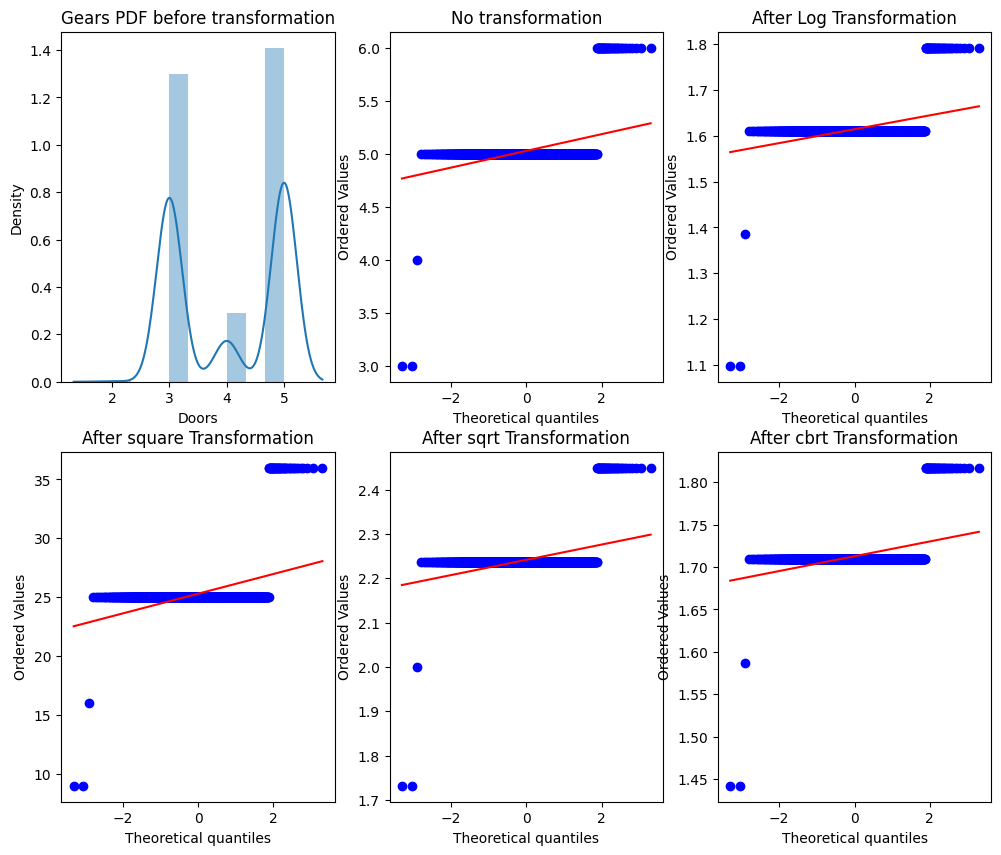

In [112]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['Doors'])
plt.title('Gears PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['Gears'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['Gears']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['Gears']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['Gears']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['Gears']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

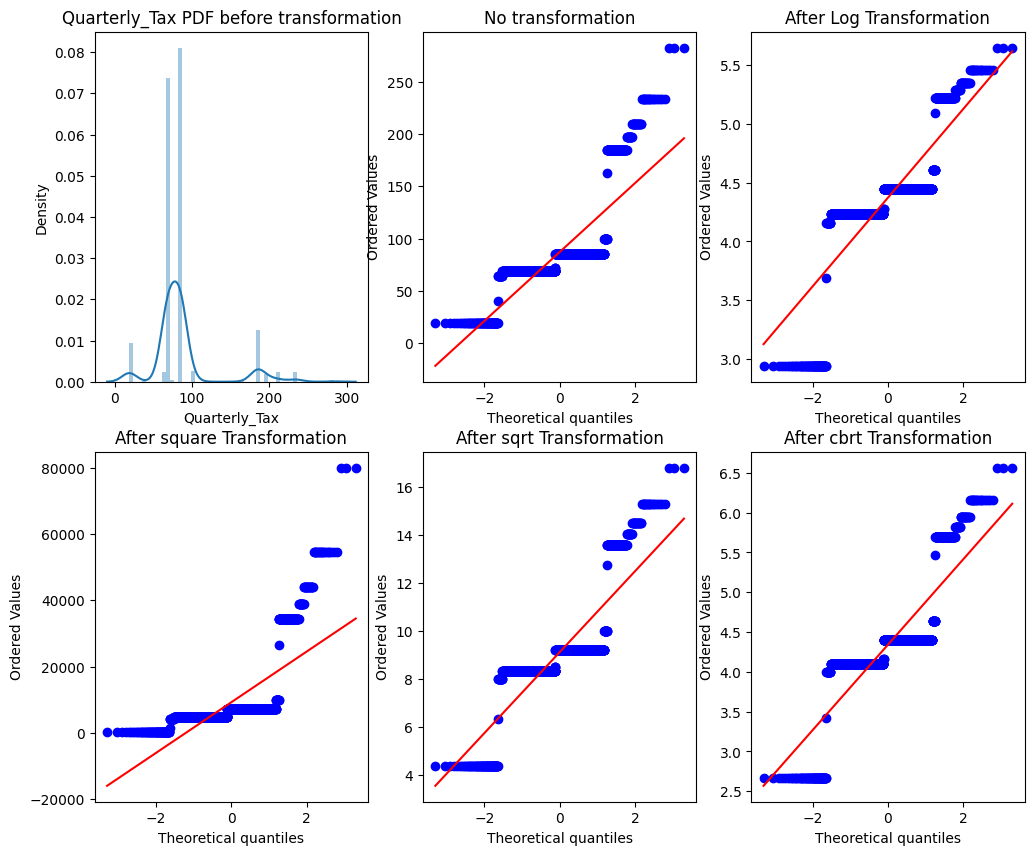

In [113]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['Quarterly_Tax'])
plt.title('Quarterly_Tax PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['Quarterly_Tax'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['Quarterly_Tax']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['Quarterly_Tax']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['Quarterly_Tax']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['Quarterly_Tax']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

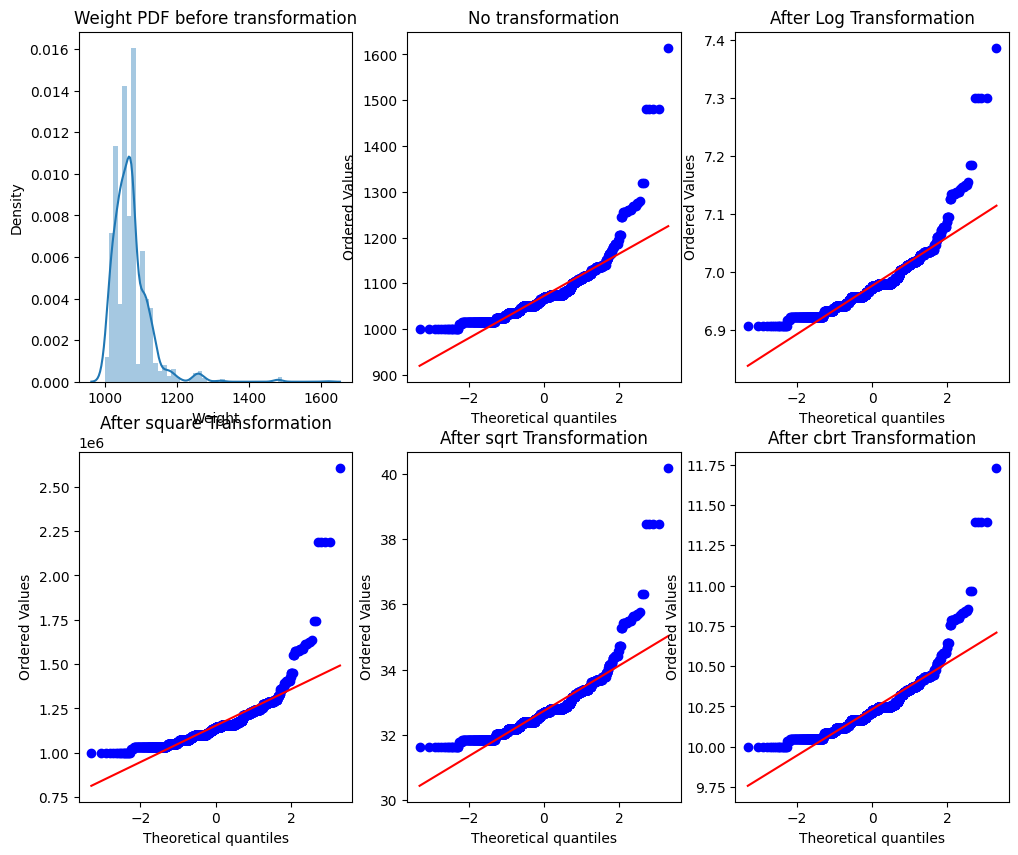

In [114]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(Corolla['Weight'])
plt.title('Weight PDF before transformation')

plt.subplot(232)
stats.probplot(Corolla['Weight'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(Corolla['Weight']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(Corolla['Weight']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(Corolla['Weight']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(Corolla['Weight']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

After Transforming the different features, we conclude that for


*   Age feature Square transformation is better
*   KM feature Square root transformation is better

*   HP feature no changes almost same
*   cc feature Square transformation is better

*   Doors feature no changes almost same
*  Gears feature no changes almost same


*   Quarterly_tax feature log transformation is better
*   Weight feature no changes almost same













In [115]:
Corolla.nunique()

Price                 236
Age_08_04              77
KM                   1263
HP                     12
cc                     13
Doors                   4
Gears                   4
Quarterly_Tax          13
Weight                 59
Predictions_Model    1434
dtype: int64

Transforming the required features

In [116]:
Corolla1=Corolla.copy()
Corolla1=Corolla1.drop('Predictions_Model', axis='columns')
Corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


Preparing a model with suitable fransformation

In [117]:
Corolla1['square_Age_08_04']=np.square(Corolla['Age_08_04']) 
Corolla1['sqrt_KM']=np.sqrt(Corolla['KM']) 
Corolla1['square_cc']=np.square(Corolla['cc'])  
Corolla1['log_Quarterly_Tax']=np.log(Corolla['Quarterly_Tax']) 
Corolla1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,square_Age_08_04,sqrt_KM,square_cc,log_Quarterly_Tax
0,13500,23,46986,90,2000,3,5,210,1165,529,216.762543,4000000,5.347108
1,13750,23,72937,90,2000,3,5,210,1165,529,270.068510,4000000,5.347108
2,13950,24,41711,90,2000,3,5,210,1165,576,204.232710,4000000,5.347108
3,14950,26,48000,90,2000,3,5,210,1165,676,219.089023,4000000,5.347108
4,13750,30,38500,90,2000,3,5,210,1170,900,196.214169,4000000,5.347108


In [118]:
Corolla1=Corolla1.drop(['Age_08_04','KM','cc','Quarterly_Tax'], axis='columns')

In [119]:
#Build model
model1= smf.ols('Price~square_Age_08_04+sqrt_KM+HP+square_cc+Doors+Gears+log_Quarterly_Tax+Weight', data = Corolla1).fit()

In [120]:
model1.fittedvalues

0       16053.249543
1       15254.969999
2       16195.011644
3       15874.920393
4       16108.971592
            ...     
1431     9552.079157
1432     9001.135164
1433     9251.464538
1434     9394.845531
1435    13032.471228
Length: 1435, dtype: float64

In [121]:
Corolla1['prediction_model1']=model1.fittedvalues

In [122]:
model1.pvalues

Intercept             6.383988e-18
square_Age_08_04     5.310510e-187
sqrt_KM               4.958625e-89
HP                    1.456630e-23
square_cc             7.296194e-01
Doors                 6.210298e-01
Gears                 1.980154e-02
log_Quarterly_Tax     2.936355e-02
Weight                2.968497e-97
dtype: float64

In [123]:
model1.rsquared

0.8260431353054731